Cloning into 'ml-coursera-python-assignments'...
remote: Enumerating objects: 254, done.
remote: Total 254 (delta 0), reused 0 (delta 0), pack-reused 254
Receiving objects: 100% (254/254), 20.51 MiB | 28.11 MiB/s, done.
Resolving deltas: 100% (76/76), done.


In [2]:
pip install os_sys 

     |████████████████████████████████| 15.6MB 269kB/s 
     |████████████████████████████████| 102kB 13.2MB/s 
     |████████████████████████████████| 235kB 40.9MB/s 
     |████████████████████████████████| 7.9MB 43.2MB/s 
     |████████████████████████████████| 10.2MB 34.7MB/s 
ERROR: Could not find a version that satisfies the requirement text-editor (from os_sys) (from versions: none)
ERROR: No matching distribution found for text-editor (from os_sys)


In [3]:
pip install --upgrade os_sys

  Using cached https://files.pythonhosted.org/packages/89/4a/ecf84210a9c02f4d246c10f28a50050c6934eb9257298eb6d7aeef32c38b/os_sys-2.1.4-py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/70/22/ed1943c0ef2be99ade872f49a20aa4cfc70eb4ffc866fc61b128211f3e5d/Django-3.2.4-py3-none-any.whl
     |████████████████████████████████| 79.6MB 118kB/s 
     |████████████████████████████████| 3.7MB 36.2MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 102kB 12.2MB/s 
  Using cached https://files.pythonhosted.org/packages/c8/05/b41bbe076da2316f4521decf22346b1f20cb81484dc49424a9e58e6f50ae/netifaces-0.11.0-cp37-cp37m-manylinux_2_5_x86_64.manylinux1_x86_64.whl
     |████████████████████████████████| 266kB 51.9MB/s 
     |████████████████████████████████| 71kB 8.1MB/s 
  Using cached https://files.pythonhosted.org/packages/d0/1b/2f292bbd742e369a100c91faa0483172cd91a1

In [4]:
!pip install utils 

In [5]:
from google.colab import files
files.upload() 

Saving utils.py to utils.py


{'utils.py': b'import sys\nimport numpy as np\nfrom matplotlib import pyplot\n\nsys.path.append(\'..\')\nfrom submission import SubmissionBase\n\n\ndef displayData(X, example_width=None, figsize=(10, 10)):\n    """\n    Displays 2D data stored in X in a nice grid.\n    """\n    # Compute rows, cols\n    if X.ndim == 2:\n        m, n = X.shape\n    elif X.ndim == 1:\n        n = X.size\n        m = 1\n        X = X[None]  # Promote to a 2 dimensional array\n    else:\n        raise IndexError(\'Input X should be 1 or 2 dimensional.\')\n\n    example_width = example_width or int(np.round(np.sqrt(n)))\n    example_height = n / example_width\n\n    # Compute number of items to display\n    display_rows = int(np.floor(np.sqrt(m)))\n    display_cols = int(np.ceil(m / display_rows))\n\n    fig, ax_array = pyplot.subplots(display_rows, display_cols, figsize=figsize)\n    fig.subplots_adjust(wspace=0.025, hspace=0.025)\n\n    ax_array = [ax_array] if m == 1 else ax_array.ravel()\n\n    for i, a

In [6]:
from google.colab import files
files.upload() 

Saving submission.py to submission.py


{'submission.py': b'from urllib.parse import urlencode\nfrom urllib.request import urlopen\nimport pickle\nimport json\nfrom collections import OrderedDict\nimport numpy as np\nimport os\n\n\nclass SubmissionBase:\n\n    submit_url = \'https://www-origin.coursera.org/api/\' \\\n                 \'onDemandProgrammingImmediateFormSubmissions.v1\'\n    save_file = \'token.pkl\'\n\n    def __init__(self, assignment_slug, part_names):\n        self.assignment_slug = assignment_slug\n        self.part_names = part_names\n        self.login = None\n        self.token = None\n        self.functions = OrderedDict()\n        self.args = dict()\n\n    def grade(self):\n        print(\'\\nSubmitting Solutions | Programming Exercise %s\\n\' % self.assignment_slug)\n        self.login_prompt()\n\n        # Evaluate the different parts of exercise\n        parts = OrderedDict()\n        for part_id, result in self:\n            parts[str(part_id)] = {\'output\': sprintf(\'%0.5f \', result)}\n        

In [7]:
# used for manipulating directory paths
import os

# Scientific and vector computation for python
import numpy as np

# Plotting library
from matplotlib import pyplot

# Optimization module in scipy
from scipy import optimize

# will be used to load MATLAB mat datafile format
from scipy.io import loadmat

# library written for this exercise providing additional functions for assignment submission, and others
import utils


# define the submission/grader object for this exercise

# tells matplotlib to embed plots within the notebook
%matplotlib inline

In [23]:
# Read comma separated data
data = np.loadtxt(os.path.join('Data', '/content/ml-coursera-python-assignments/Exercise1/Data/ex1data1.txt'), delimiter=',')
x, y = data[:, 0], data[:, 1]

m = y.size  # number of training examples

In [31]:
x= np.stack([np.ones(m), X], axis=1)

In [32]:
def plotData(x, y):
    
    fig = pyplot.figure()  # open a new figure
    
    pyplot.plot(x, y, 'ro', ms=10, mec='k')
    pyplot.ylabel('Profit in $10,000')
    pyplot.xlabel('Population of City in 10,000s')

In [41]:
m=y.size
m

97

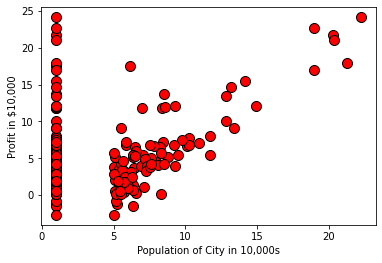

In [33]:
plotData(x, y)

In [34]:
def computeCost(x, y, theta):
    
    # initialize some useful values
    m = y.size  # number of training examples

    # You need to return the following variables correctly
    J = 0
    
    # ====================== YOUR CODE HERE =====================
    h = np.dot(x, theta)
    
    J = (1/(2 * m)) * np.sum(np.square(np.dot(x, theta) - y))
    
    # ===========================================================
    return J

In [35]:
J = computeCost(x, y, theta=np.array([0.0, 0.0]))
print('With theta = [0, 0] \nCost computed = %.2f' % J)
print('Expected cost value (approximately) 32.07\n')

# further testing of the cost function
J = computeCost(x, y, theta=np.array([-1, 2]))
print('With theta = [-1, 2]\nCost computed = %.2f' % J)
print('Expected cost value (approximately) 54.24')

With theta = [0, 0] 
Cost computed = 32.07
Expected cost value (approximately) 32.07

With theta = [-1, 2]
Cost computed = 54.24
Expected cost value (approximately) 54.24


In [36]:
def gradientDescent(X, y, theta, alpha, num_iters):
    """
    Performs gradient descent to learn `theta`. Updates theta by taking `num_iters`
    gradient steps with learning rate `alpha`.
    
    Parameters
    ----------
    X : array_like
        The input dataset of shape (m x n+1).
    
    y : arra_like
        Value at given features. A vector of shape (m, ).
    
    theta : array_like
        Initial values for the linear regression parameters. 
        A vector of shape (n+1, ).
    
    alpha : float
        The learning rate.
    
    num_iters : int
        The number of iterations for gradient descent. 
    
    Returns
    -------
    theta : array_like
        The learned linear regression parameters. A vector of shape (n+1, ).
    
    J_history : list
        A python list for the values of the cost function after each iteration.
    
    Instructions
    ------------
    Peform a single gradient step on the parameter vector theta.

    While debugging, it can be useful to print out the values of 
    the cost function (computeCost) and gradient here.
    """
    # Initialize some useful values
    m = y.shape[0]  # number of training examples
    
    # make a copy of theta, to avoid changing the original array, since numpy arrays
    # are passed by reference to functions
    theta = theta.copy()
    
    J_history = [] # Use a python list to save cost in every iteration
    
    for i in range(num_iters):
        # ==================== YOUR CODE HERE =================================
        theta = theta - (alpha / m) * (np.dot(X, theta) - y).dot(x)

        # =====================================================================
        
        # save the cost J in every iteration
        J_history.append(computeCost(x, y, theta))
    
    return theta, J_history

In [38]:
# initialize fitting parameters
theta = np.zeros(2)

# some gradient descent settings
iterations = 1500
alpha = 0.01

theta, J_history = gradientDescent(x ,y, theta, alpha, iterations)
print('Theta found by gradient descent: {:.4f}, {:.4f}'.format(*theta))
print('Expected theta values (approximately): [-3.6303, 1.1664]')

Theta found by gradient descent: -3.6303, 1.1664
Expected theta values (approximately): [-3.6303, 1.1664]


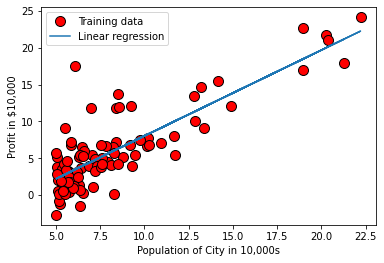

In [40]:
# plot the linear fit
plotData(x[:, 1], y)
pyplot.plot(x[:, 1], np.dot(x, theta), '-')
pyplot.legend(['Training data', 'Linear regression']);